# Introduction to Neural Networks

[![Open in GitHub Codespaces](https://github.com/codespaces/badge.svg)](https://github.com/codespaces/new/LearnToDiscover/Case_Studies_L2D)

The content of this notebook is based on the following resources:
- Course notes from *Deep Learning Crash-Course for bioscientists, session 1: introduction to neural networks* by Sofia Miñano. Available online [here](https://github.com/sfmig/deep-learning-biosciences)
- Jupyter notebook *Introduction to Neural Networks using PyTorch*, by Mohamed Ali al-Badri

Further references are included at the end of the notebook.

## Summary and Setup

### Setting up virtual environment
Follow the instructions [here][def] to create a virtual environment and launch the notebook.


### Datasets
The datasets we will use will be downloaded as part of the notebook.

[def]: https://github.com/LearnToDiscover/Case_Studies_L2D/README.md

## Questions

- What is deep learning?
- What is a neuron? 
- What is a layer? 
- What is a neural network?
- How do we train a neural network to solve a task?
- How do we assess how good a trained neural network is?

## Objectives

- Understand the basic components of a vanilla neural network
- Understand the main elements involved in training a neural network
- Explore the MNIST classification example

## Prerequisites

- We assume the core courses have been completed, and also familiarity with Python and virtual environments

## 1. Introduction to deep learning

The main objective of the course is to get an overview of how neural networks work, and give you a good starting point if you want to dive deeper into these models, for fun or to apply them in your research. 

In this notebook, we will mainly explore a 'vanilla neural network': it is the simplest network architecture and not really used in practice, but it is very useful to understand the basic concepts of training deep neural networks. 

### But what is deep learning?

Deep learning is an approach to **artificial intelligence** (AI). 

With "artificial intelligence" we refer to the ability of machines mimicking human cognitive functions, such as learning or problem solving. 

> Interestingly, as machine intelligence has become increasingly capable, some of the tasks that used to be considered AI tasks are no longer seen as such. This is known as the [AI effect](https://en.wikipedia.org/wiki/AI_effect#:~:text=The%20AI%20effect%20occurs%20when,is%20not%20%22real%22%20intelligence.). A nice example of this is optical character recognition, which was once considered a challenging AI problem but has now become a standard technique. 

Deep learning is also a **machine learning** method. 

Machine learning (ML) encompasses all sorts of techniques that enable computers to improve their performance in certain tasks using prior experience and data. With deep learning, we gather knowledge from data using neural networks. One advantage of neural networks is that knowledge is inherently represented compositionally - we can roughly understand this as neural networks representing the world as a nested hierarchy of concepts.

> ML methods usually depend heavily on how the input data is represented. The transformation of the input data into more informative representations, or features, is usually called 'feature extraction'. This was traditionally done by hand, usually by formalising with mathematical expressions what we think is relevant from the data. But generally determining which features are relevant for a particular problem is not easy. An advantage of deep learning is that the neural network itself acts as a feature extractor. So we somewhat bypass the need to define hand-crafted features, and instead let the network learn which features are more relevant for solving the task. Learnt representations (rather than hand-designed ones) often perform better, and evidence suggests they make AI systems more adaptable to new tasks. You can find a good intuition for these ideas in [this 3Blue1Brown video](https://www.youtube.com/watch?v=aircAruvnKk).

Deep learning has proven to be particularly well-suited to solve 'intuitive' problems: tasks that are easy for humans to perform, but that are very hard to describe formally. Think about tasks such as detecting objects in an image, captioning a picture or transcribing human speech. 

> And why is that? It is thought that the combination of being able to gather knowledge from experience, and being able to represent information hierarchically allows deep learning models to excel at this type of tasks.

In this lesson, we are going to use the popular framework PyTorch to explore the basics of deep learning. 

We will start inspecting a single neuron, and then move up to a vanilla neural network, also called multi-layer pereceptron (MLP). We will use the MLP example to show how we train and evaluate a network.

> If you want to read more about how AI, ML and deep learning relate to each other, check out [Chapter 1 of the Deep Learning book](https://www.deeplearningbook.org/contents/intro.html) 

### Import functions

Let's begin by importing the required PyTorch modules, together with Numpy and Matplotlib.pyplot.

In [ ]:
import torch # this is the PyTorch module
import torch.nn as nn # this is the neural network module
import torch.nn.functional as F # this is the functional module
import torch.optim as optim # this is the optimizer module
import torchvision # this is the vision module

import warnings
warnings.filterwarnings("ignore") # this is to ignore warnings

# Import the MNIST dataset
from torchvision import datasets, transforms

# Import the matplotlib module
import matplotlib.pyplot as plt

# Import the numpy module
import numpy as np

## 2. Structure of a neural network

### Neurons and layers

Neurons are the basic unit of a neural network, and they are organised in layers
> Remember that this hierarchy of concepts is characteristic of deep learning.


For example, in Fig. 1 we are representing a neural network consisting of:
- an initial layer of 3 neurons and 
- a second layer with only 1 neuron.

    <p>
        <img src="Fig_neurons.png" alt="drawing" width="300"/>
    </p>
    <p>
        <em>Fig. 1 : schematic of a simple perceptron</em>
    </p>

We can think of each neuron as holding a number. In the example above:
- The neurons in the initial layer hold each of the input values: $x_1, x_2, x_3$
- The single neuron in the second layer holds the output of a certain function $f$, that takes as
input the output of all the neurons in the previous layer
- This function $f$ is called *activation function*. There are different types of activation
function, as we will see later in the notebook.

### The multi‐layer perceptron

A multi‐layer perceptron (MLP) is just an extension of the idea above, adding more neurons and more layers.

MLPs have at least one layer between the first layer and the last layer: 
- the first layer is called *input layer*,
- the last layer is called *output layer*,
- the layers between the input and output ones are called *hidden layers*, and each of them typically has a large number of neurons. 

    <p>
        <img src="Fig_mlp.png" alt="drawing" width="500"/>
    </p>
    <p>
        <em>
            Fig. 2: Input, hidden and output layers in a MLP. Modified from a screenshot of 
            <a href="https://www.youtube.com/watch?v=aircAruvnKk"> 
                this 3Blue1Brown video
            </a> 
        </em>
    </p>

But how do we decide the number of neurons per layer for our network? And the number of layers?
- The number of neurons and layers varies per application and its often decided empirically, that is, based on what has proven to work well in the past.
- However, there are methods for comparing performance across different architectures to make choices

> You can read more on neural networks architectures [here](http://cs231n.github.io/neural‐networks‐1/#nn) and on the [Deep Learning book section 6.4](https://www.deeplearningbook.org/contents/mlp.html)

Neurons in an MLP behave exactly as we saw in the simpler case: at each layer after the input layer, each neuron:
- receives as input all the neurons in the previous layer,
- passes these inputs through a certain activation function $f$, and 
- outputs a value. 
This is carried out at every layer until the output layer. 

> These networks are also called fully‐connected, since all the neurons in one layer are connected to all previous ones. But there are other types of possible connections across layers, as we will see in future notebooks on convolutional neural networks.

The neurons in the input and output layer are slightly special in the sense that the number they hold doesn't come from the output of a 'standard' activation function. 

This is easier to explain if we consider a classic example: imagine we are using an MLP to classify an image of a handwritten digit into a digit between 0 and 9.
- The neurons in the input layer will simply hold the input values. So in our example, we will have 784 neurons in this layer holding the 784 pixel values that make up each image.
- The neurons in the output layer will hold the classification decision, that is, the answer to the question *What digit is represented in the image?*. 

  In our case, any given image can be classified in 1 of 10 classes, each corresponding to the the digits from 0 to 9. A convenient way to represent this in the output layer would be to have 10 neurons, each of them holding a number that represents how confident the model is that the input image represents the corresponding class (digits in our case).


> The process of computing the values at the output layer for a given input is called *the forward pass*. A detailed explanation of the forward pass is provided [here](https://cs231n.github.io/neural-networks-1/)
>
> The example above is based on the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), a large reference dataset in image processing and computer vision consisting of 70000 handwritten digits.
>
> You can read more about multi‐layer perceptrons in [the Deep Learning book](https://www.deeplearningbook.org/) sections 1.2.1 and 6.6 and on this [CBMM lecture](https://youtu.be/RTTQctLuTVk?t=136)

In the next example, let's zoom in into what actually goes on in a single neuron computation.

 ### Walk through example: exploring the activation function

How do we compute the output of a neuron?

A neuron in a hidden layer will compute its output as follows:
1. It will take as inputs $x$ the outputs of all the neurons in the previous layer.
2. It will compute a weighted sum of the inputs $\Sigma$ and add a bias term $b$ to it. 
3. It will pass the result of $\Sigma+b$ to a non-linear function, called the activation function $h$.

A schematic of this computation is shown in the figure below:
<p>
    <img src="Fig_neuron_computation.png" alt="drawing" width="200"/>
</p>
<p>
    <em>
        Fig. 3: Computing the output of a neuron in a hidden layer 
    </em>
</p>


The fact that the activation function is non-linear is an important aspect: it is required for the MLP to be able to approximate any function (along with a hidden layer with enough number of neurons).

> More on neural networks being universal function approximators:
> - [the Deep learning book, section 6.4](http://www.deeplearningbook.org/contents/mlp.html)
> - [Course notes from the Stanford course CS231n](http://cs231n.github.io/neural‐networks‐1/#power)
> - [Michael Nielsen’s Neural networks and deep learning, chapter 4](http://neuralnetworksanddeeplearning.com/chap4.html)

The activation function is the mathematical representation of the artificial neuron's response, and it is loosely inspired in how biological neurons work: like biological neurons, the artificial neuron will only respond to inputs beyond a certain threshold.

There are many non-linear functions that represent this behaviour and that we could select as activation functions. A commonly used one is the rectified linear unit or ReLu function. With a ReLU activation the neuron's output $h$ would be computed as:

$ h = max(0, wx+b)$

where $x$ is the input data, $w$ are the neuron's weights and $b$ is the bias term. The weighted sum $wx$ can be seen as the neuron attending to different parts of the input. The bias term $b$ can be seen as the parameter regulating what is large enough for the neuron to respond.

The ReLU function is a popular choice due to its properties when it comes to optimisation via gradient descent. However, there are other common options for activation functions. For example, using a hyperbolic tangent function (or *tanh* function) a neuron's output would be: 
 
$h = \tanh{(wx+b)}$

where $x$ is the input vector, $w$ are the weights and $b$ is the bias term. 

The weights and biases of all the neurons in a network are the parameters of the network. As we will see later in the notebook, these will be optimised (via learning) to improve the performance of the network at a specific task.

But for now we will further explore how a neuron works. Read through the code cell below to explore three different activation functions: a sigmoid function, ReLU and tanh. 

In [ ]:
# There are multiple activation functions that can be used for a neuron. 
# Instead of just tanh, we can also use sigmoid, ReLU, among others.
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x)


# Define the sigmoid, ReLU, and tanh activation functions:
activation_functions = [np.tanh, sigmoid, relu]

# Plot the activation functions as separate plots:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Define the input values as a range with Numpy's arange function. The values are given as start, stop and step:
x = np.arange(-5, 5, 0.1)

# Loop over the activation functions:
for i, ax in enumerate(axes.flat):
    y = activation_functions[i](x)
    ax.plot(x, y)
    ax.set_title(f'{activation_functions[i].__name__}')
    ax.axhline(y=0, color='k', linestyle='--', lw=0.2)
    ax.axvline(x=0, color='k', linestyle='--', lw=0.2)
    ax.set(xlabel='Input x', ylabel='Output y')

# Add a sup title:
fig.suptitle('Activation Functions', fontsize=16)

# Insert a gap between the suptitle and the three plots:
fig.subplots_adjust(top=0.85)
fig.subplots_adjust(wspace=0.25)
plt.show()


These graphs show the relationship between the input and the output of each activation function. Note how they all represent the biologically-inspired behaviour we mentioned. In all three of them, input values below 0 return negative or very small values, whereas input values larger than 0 produce positive outputs, larger the further they are from 0. 

Next, we define a neuron as a Python function that computes the weighted sum of the inputs, adds to it a bias term, applies an activation function and returns an output. In this case, we focus again on a *tanh* activation function.

In [ ]:
# using numpy, define a function that serves the role of an individual neuron:
def neuron(x, w, b, activation_function=np.tanh):
    # calculate the dot product of the inputs and the weights
    z = np.dot(x, w) + b
    # apply the activation function
    a = activation_function(z)
    return a

Now that we have defined the function of a single neuron, we can experiment with different weight values, to observe their effect on the neuron's output. For clarity, we will set the bias term to zero, that is $b=0$. Using a ```for``` loop, we can specify a specific range of input weights $w$ to display.

In [ ]:
# To see the effect of different weights for a given input, we can plot the output of the neuron for different weights.
# Create a numpy array, and specify values from 
for i in np.arange(-0,1.1,0.2):  # a range of weights from 0.0 to 1.0, in steps of 0.2
    x = np.arange(-4, 4, 0.1)
    y = neuron(x, w=i, b=0)
    plt.plot(x, y, label=f'w = {i.round(2)}')

    # Within matplotlib.pyplot, we can specify a legend, its position and x- and y-axis labels, as follows:
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Input x')
    plt.ylabel('Output y')
    
# Specify dotted lines at x=0 and y=0 for reference
plt.axhline(y=0, color='k', linestyle='--', lw=0.2)
plt.axvline(x=0, color='k', linestyle='--', lw=0.2)

plt.title('Neuron with different input weights, and no bias')

plt.show()

Notice how the shape of the curve changes with different weight values. For large values of $x$, the larger the weight $w$, the larger the output $y$. Additionally, for a given increase in input $x$, a curve with a larger weight $w$ produces a much larger increase in output $y$. That is, the ramp up towards large output values is sharper for a larger weight.

Now let's visualise the effect of introducing a range of biases. We will fix a weight value of $w=1$, apply a range of values of the bias term $b$, and plot these using a `for` loop as we did above.

In [ ]:
# To see the effect of different biases for a given input, we can plot the output of the neuron for different biases.

for i in np.arange(-1,1.1,0.4):
    x = np.arange(-4, 4, 0.1)
    y = neuron(x, 1, b=i)

    plt.plot(x, y, label=f'b = {i.round(2)}')

    # Within matplotlib.pyplot, we can specify a legend, its position and x- and y-axis labels, as follows:
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Input x')
    plt.ylabel('Output y')
    
# Specify dotted lines at x=0 and y=0.
plt.axhline(y=0, color='k', linestyle='--', lw=0.2)
plt.axvline(x=0, color='k', linestyle='--', lw=0.2)

plt.title('Neuron with different biases, and input weight = 1')

plt.show()

Note that by adding a bias term to the input, we are effectively displacing the curves along the x-axis. The intuition is that the bias term allows us to position the transition point of each of the S-shaped curves.

These two examples showcase how the weights and bias of a neuron change its response to inputs. By changing the weights, we can modify how much positive or negative input values are amplified or suppressed. By changing the bias term, we can change the threshold value fom which the neuron will return a positive value.

## 3. Training a simple MLP

### Goal of training

We now know that a network is characterised by:
- its architecture, that is, the number of layers and the number of neurons per layer, and
- its parameters, that is, the weights and biases of all the neurons in all of its layers.

So how many parameters will a reasonably-sized network have? Let's recap:
- each connection between neurons will have its own weight $w$,
- each neuron will have its own bias term $b$, and
- each layer is made up of a large number of neurons.

If we consider a small MLP to solve our previous task of classifying handwritten digits, we may have:
- an input layer with 784 neurons (one neuron per pixel in a given input image of the MNIST dataset)
- 2 hidden layers, of 16 neurons each
- an output layer with 10 neurons, one for each class we want to classify the input images in.

That results in 13002 parameters in total. This would be a very small network, but it is still a reasonably large number of parameters whose value we need to determine.

> Parameter count breakdown:
> - In the hidden layer 1, we will have 784*16 weights, and 16 biases 
> - In the hidden layer 2, we will have 16*16 weights, and 16 biases
> - In the output layer we will have 16*10 weights, and 10 biases
> Remember that the neurons in the input layer hold the input values only


With an ideal set of parameters, we would feed a certain image to this MLP (for example, an image of a handwritten "3"), and the transformations across the layers would end up with the neuron corresponding to the correct class ("3") having the highest score in the output layer.

But how do we find these ideal parameters? This is actually an optimisation problem: our goal is to obtain the optimal weights
and biases of the network, that is, the weights and biases that minimise the error when recognising digits

This is what we do when we train the network, which is what we'll cover in the next part of the notebook

### The training set

During training, we will input labelled data to the network. This kind of data is called 'labelled' because for each input we have a label that contains the answer to the question we are asking the network. 

For example, in our previous example, our input would be the image of a handwritten digit, and its label would be the digit it represents (see Fig. 3). The labels are also called ground-truth, because they represent the true answer (as opposed to a prediction) 
    <p>
        <img src="Fig_training_intuition.png" alt="drawing" width="500"/>
    </p>
    <p>
        <em>
            Fig. 4: Intuition behind the training procedure. Input image and network diagram modified from a screenshot of 
            <a href="https://www.youtube.com/watch?v=aircAruvnKk"> 
                this 3Blue1Brown video
            </a> 
        </em>
    </p>

> In this simple example we are focusing on supervised learning, which makes use of labelled data. This is a popular machine learning approach, but be
aware that there are many other approaches to learning too, some of which don't require labelled data.


During training, for every input labelled sample the network will execute a normal forward pass, ignoring the label. So after going through all the layers, the network will output a prediction for the given input. Only at this point we will use the label, to compare the prediction to the ground-truth! Depending on how far off the prediction is, we will adapt the network's weights and biases so that it improves its performance in the next pass. The idea is that as training progresses, the network's predictions become closer and closer to the labels.

The complete set of inputs that we present to the network during training constitutes the training set. The hope is that with the network's architecture and the training approach, the model will be able to generalise beyond the training set, and perform the task well also for new unseen data.

In reality, the whole set of labelled data is divided into a training and a test split. The training split is used as described above, whereas the test split is used to evaluate the performance of the trained network. This way we can use some of the samples for which we have ground-truth to assess how well the network does when we show it data that it has not seen during training.

### Training as an optimisation problem

We need to further clarify two aspects of the training process:
- First, how exactly do we compare predictions and labels? We will capture this with the concept of **loss
function**.

- Second, how do we update the values of the weights and biases of the network, so that the network makes better predictions in future passes? We will do this by optimising the values of the weights and biases using a method called **gradient descent**

### The loss function

The intuition behind the loss function is that it describes how good a certain collection of weights and biases is at executing the task. Sometimes the loss function is also called cost function or objective function. The loss function comes into play at the end of the forward pass. 

We will focus our explanation on the cross-entropy loss, a popular choice for the loss function for classification problems with multiple classes (like the handwritten digit recognition example).
> In the walk-through examples below, we will explore two other loss functions
> - the mean-square error loss, often used in regression problems (like the one in the example),
> - the negative log-likelihood loss, which is very similar to the cross-entropy loss. In Pytorch, their implementations just differ in the expected format of the input: [`CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) takes raw prediction values (unnormalised scores) while [`NLLLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html) takes log probabilities.

To compute the cross-entropy loss, we need:
- the network's predictions expressed as a probability, and
- the ground-truth, also expressed as a probability.

The intuition behind the cross-entropy loss is that it measures how far off the true and the predicted probability distributions are. 
> You can read more on the cross-entropy loss in [chapter 3 of the Deep Learning book](https://www.deeplearningbook.org/contents/prob.html)

Let's see how we compute these two for our handwritten digit classification example.

At the end of the forward pass, we arrive at the output layer, where each neuron holds a score for the class it represents.

Ideally, we would like the score for the correct class to be very high, and highest than any of the other scores. But at this point the numbers at the output layer are just numbers, ‘raw’ unnormalised scores that are not comparable between them -  it would be very nice if these numbers would actually represent a probability distribution across the classes, reflecting the network’s prediction.
> These numbers or 'raw' scores are considered unnormalised log probabilities, and are sometimes called unnormalised logits.

This is exactly what the *softmax* function does. It is a function that takes as inputs $K$ real numbers (or "scores") and transforms them into a probability distribution (in which each probability is proportional to the exponential of the score). So after applying the softmax function to the raw scores, each output neuron will now hold a value between 0 and 1, and all of them will add up to 1.
> You can read more on the softmax function [here](https://machinelearningmastery.com/softmax-activation-function-with-python/#:~:text=Softmax%20is%20a%20mathematical%20function,each%20value%20in%20the%20vector.)

The softmax function is non-linear, and in networks designed for solving multi-class classification problems we can actually see it as the activation function for the neurons in the output layer. Note that the softmax function is *not* the loss function! It is only a first step towards computing the loss.

So now we have the network's predictions expressed as a probability, but we would like to have the ground-truth also expressed as a probability. For this we can simply define the ground-truth probability distribution as being 1 at the correct class, and 0 elsewhere.

Now we are ready to compute the cross-entropy loss, and assess how far off our distributions are. The mathematical expression for this loss is:

$ H (p,q) = - \sum_{x} p(x) q(x) $,

where $x$ are the different classes, $p$ the probability density function for the network's predictions, and $q$ the probability density function for the ground-truth.
Note that the cross‐entropy function returns a scalar (i.e., a number) for one input image.

The full loss of the complete dataset would be the average loss across all of the training samples. We will see later that if the training samples are too many, this will slow down the training process, and in practice often only a small portion of samples is taken to compute the average loss.

### Gradient descent

Now we are going to talk about the second and last aspect of the training process: the optimisation of the weights and biases, or how we go about adapting the parameters
of the network to improve its performance.

> [This video](https://www.youtube.com/watch?v=IHZwWFHWa-w&list=RDCMUCYO_jab_esuFRV4b17AJtAw&index=2) from 3Blue1Brown describes very well the intuition behind gradient descent. Notice that in his example, he uses the term "cost function" instead of "loss function", and also he uses the sum of square errors as a loss function, rather than the cross-entropy loss as we use here.

It is easier to understand gradient descent first for a 1D-case, that is, for a function $f$ with one input $x$ and one output $y=f(x)$. To find the minimum of this function $f$ using gradient descent, we would roughly follow these steps:
- We would first start at a random point $x$ and compute the derivative of the function there, $df/dx$. 
- Notice that the derivative of $f$ at a certain point $x$ is the slope of the line tangent to the curve at the location $x$. This line tells us locally how $f(x)$ varies with $x$. The idea is that we can get closer to the lowest point of the curve $f(x)$ (i.e., the minimum) by taking a small step in $x$ in the direction of the line tangent to the curve.
- We can do that and reach a new $x'$ location, that is $\Delta x$ off the original point. At this new $x'$ location we repeat the process, and continue to do so iteratively.
- Notice that if every time we move an amount $\Delta x$ that is proportional to the slope we will prevent overshooting the minimum, since as we approach the minimum the slope becomes flatter and flatter, and therefore the slope value is increasingly closer to 0.

We can see the gradient as the generalisation to higher dimensions of the line tangent to the 1D curve. Consider a function of multiple inputs and one output (like our cross-entropy loss function). We can visualise this generic function as a surface, that for every $x$ and $y$ values returns a surface height $z$. The gradient of this function evaluated at a certain point $x, y$ is a vector that tells us the direction in which the function increases the most. 

The inputs of our loss function are the network’s weights and biases, and its output is the loss value. The gradient of this function will then be a vector that for each set of weights and biases, tells us how much we need to vary them to **increase** more steeply the loss.

But we want to decrease the loss right? This as an easy fix: we simply change the values of the weights an biases based on the **negative** of the gradient! The negative of the gradient would be the vector that points in the direction in which the loss **decreases** more steeply.

The simplest way we can update the network parameters using the gradient would be something like this:
<p>
        <img src="Fig_simple_parameter_update.png" alt="drawing" width="300"/>
    </p>
    <p>
        <em>
            Fig. 5: A simple rule to update the weights and biases $W$ of the network
            </a> 
        </em>
    </p>

where $W^{n+1}$ are the updated network's parameters (its weights and biases), $W^{n}$ are the parameters at the current state $n$, $\alpha$ is a parameter called the learning rate and $\nabla L_{W}$ is the gradient of the loss with respect to the network's parameters


> This form of parameter update is actually very vanilla and never used, but it is the main idea behind all parameter update rules. Other popular rules are momentum, RMSprop, or Adam - you can read more about them [here](http://cs231n.github.io/neural‐networks‐3/#update)

We carry out a parameter update every time we compute a full loss - but if costly, we will carry out one every time we compute the loss for a batch of the data
> The approach of using batches of data to compute the loss instead of the full dataset is called "stochastic gradient descent" - you can find a very nice explanation on why this is done in this [video](https://www.youtube.com/watch?v=-_4Zi8fCZO4) by Andrew Ng.

We have now covered the main ideas behind the training process! Check the following examples to deepen your understanding of some of the key concepts.

### Walk-through example: computing gradients in PyTorch

We have seen in the previous section how in gradient descent, we use the gradient of the loss function to update the weights and biases of the network, so that it the next pass the loss is decreased. In this example, we will inspect how we can compute the gradient of a simple function in PyTorch.

Take the following function $y = 2x^3 + x + 1$. Can you compute its derivative by hand $dy/dx$ by hand and evaluate it at $x = 2$?
> Solution: 
>
> $dy/dx = 6x^2 + 1$
>
> $dy/dx (x=2) = 25$


Now confirm the result matches the Pytorch approach presented below. Notice how we first define a Pytorch tensor $x$, which represents the point of interest. 

> A Pytorch tensor is equivalent to a Numpy array

We then compute the gradient of $y$ with respect to $x$, $dy/dx$ using the `backward()` method. The name 'backward' refers to the back-propagation algorithm, which is the way we implement the gradient computation.

In [ ]:
# define a tensor for x, and 
# set requires_grad to True: this indicates to PyTorch that we plan to compute
# the gradient of this tensor
x = torch.tensor(data=2.0, requires_grad=True)

# define the function y; the double asterisk denotes 'to the power of'.
y = 2*x**3 + x + 1

# calculate the gradient of y with respect to x:
y.backward()

# Assign the gradient (dy/dx) to a variable, and print:
dy_dx = x.grad
print(f'dy/dx for x = 2: {dy_dx}')

We can define a whole range of $x$ values, and inspect the gradient $dy/dx$ for different values of $x$.

Below we assign a range of $x$ values to a variable `x_range`, and use a for loop to compute $dy/dx$ for each $x$ value.

In [ ]:

# Plot the function y and the gradient dy/dx at a range of values for x, using Numpy's arange function.
x_range = np.arange(-5, 5, 0.1)

# Calculate the gradient of y with respect to x using PyTorch iteratively over the range of values for x:

#Begin by creating two empty lists:
dy_dx_torch = []
y_list = []

#Populate these with the following for loop: 
for i in x_range:
    x = torch.tensor(i, requires_grad = True)
    y = 2*x**3 + x + 1
    y.backward()
    dy_dx_torch.append(x.grad)
    y_list.append(y.item())

# Convert these lists into numpy arrays:
dy_dx_torch = np.array(dy_dx_torch)
y = np.array(y_list)

# Plot the function y and the gradient dy/dx at a range of values for x:
plt.plot(x_range, y, label='y')
plt.plot(x_range, dy_dx_torch, label='dy/dx')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function y and its gradient dy/dx')
plt.show()

Remember that the value of $dy/dx$ is the slope of the line tangent to $y$ at each $x$ location. Notice how when the $y$ curve (blue) is flat in the vicinity of $x=0$, the slope value (orange) is also close to 0, as the line tangent to the curve in that region is almost horizontal.

Let's apply this to a more complex function: that of the neuron, itself.

In [ ]:
# We can define the same neuron function as before, but this time using PyTorch instead of Numpy:

def neuron_in_pytorch(x, w, b, activation_function=torch.tanh):
    # Calculate the dot product of the inputs and the weights:
    z = torch.dot(x, w) + b
    # Apply the activation function to the dot prdouct:
    a = activation_function(z)
    return a

# Define a tensor for x, make it a vector, and set requires_grad to True:
x = torch.tensor([0.2, 0.3], requires_grad=True)

# Define the weights and bias:
w = torch.tensor([1.0, 0.4])
b = torch.tensor(1.0)

# Define the function y:
y = neuron_in_pytorch(x, w, b)

# Calculate the gradient of y with respect to x:
y.backward()

# Assign the gradient (delta y over delta x) to a variable, and print:
dy_dx = x.grad

print(f'dy/dx for x = [0.2, 0.3]: {dy_dx}')

We have now computed the gradient of the function that represents the computation of a single neuron!

### Walk-through example: gradient descent

Now we can check a simple example of how gradient descent works.

As we have seen gradient descent is an optimisation algorithm used to train neural networks, although it has a wider use than that. Its goal is to find the values that minimise a function. It does so iteratively, by updating the input value $x$ following a certain rule. In deep learning, the function we are trying to minimise is the ***loss function***, which as we know takes as inputs the weights and biases of the neural network.

Our goal then is to find the weights and biases that *minimize the loss function*. That is, we want to determine the parameters of the network that minimise the difference between the predicition of the neural network and the ground-truth.

Gradient descent tells us to take the gradient of the loss function with respect to the weights and biases, and then to update the values of these parameters following the negative of the gradient. This is equivalent to computing the derivative of the loss with respect to each of the weights and biases in the network, and adjusting their values accordingly.


Let's begin by defining a simple function $y$:

$y = x^2$ 

From visual inspection we can see the minimum of this function is at $x$ = 0

In [ ]:
# Plot a x^2 function:
x = np.arange(-2, 2.1, 0.1)
y = x**2
plt.plot(x, y)
plt.xlabel('Input x')
plt.ylabel('Output y')
# Using matplotlib.pyplot's annotate function, label the minimum with a black arrow, and text label, as follows:
plt.annotate('Minimum', xy=(0, 0), xytext=(0, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

We can now define a Python function to implement the *gradient descent* algorithm that takes as inputs the input $x$, a specified learning rate (a step size for the gradient descent), and a fixed number of iterations.

In [ ]:

# Write a function that starts with a random value for x, and then iteratively updates x using the gradient descent algorithm:
def gradient_descent(x, learning_rate=0.1, n_iterations=100):

    learning_rate = torch.tensor(0.1)
    x_list = []
    for i in range(n_iterations):
        # Define the function y:
        y = x**2
        # Calculate the gradient of y with respect to x:
        y.backward()
                
        with torch.no_grad():
            # Update x; here -= subtracts learning rate * x.grad from x, and assigns the result to the variable x.
            x -= learning_rate * x.grad
            # Print the updated value of x:
            print(f'x at iteration {i}: {x}')
            # Append the updated value of x to the list:
            x_list.append(x.item())
            # Set the gradient to zero, otherwise it will accumulate:
            x.grad.zero_()  
    return x, x_list



We can now call the `gradient_descent` function to find the $x$ value at which $y$ is minimum. Let's run it for around 150 iterations.

In the code snippet below, we plot the value of $x$ at each optimisation step with a red star, to visualise how the optimisation progresses.

In [ ]:
# Define a tensor for x, make it a scalar, and set requires_grad to True:
x = torch.tensor(20.0, requires_grad = True)

# Call the gradient_descent function:
x, x_list = gradient_descent(x, learning_rate=0.1, n_iterations=150)

# Plot the function y = x^2:
x = np.arange(-20, 20.1, 0.1)
y = x**2
plt.plot(x, y)

# Plot the values of x that were updated during gradient descent, make each point a red star and overlay it onto
# the function y = x^2:
plt.scatter(x_list, [i**2 for i in x_list], color='red', marker='*', s=100, zorder=10)
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.show()

plt.plot(x_list)
plt.axhline(y=0, color='r', linestyle='--', label='true $x_{minimum}$')
plt.xlabel('iteration')
plt.ylabel('x')
plt.legend()
plt.show()

In the first plot and in the printout of the values, we can see how the values of $x$ considered during the optimisation converge to the true minimum $x=0$. The steps between values of $x$ also becomes smaller, as expected since we the parameters' update is proportional to the slope. In the second plot, we can see that already with around 65 iterations we get a decent estimate.

## Testing and inference

We have inspected in detail how we train a simple neural network, but what happens once we have a fully trained model?

It is important at this point to assess how good our model is at the task. Following our handwritten digit recognition example, a simple way to do this would be to feed sample images of handwritten digits to the network and check what class the network predicts for each of them. This is represented in the schematic below, which shows how we can compute the accuracy of the model on the handwritten digit classification task (with the accuracy being number of correct predictions over total).


<p>
    <img src="Fig_testing_intuition.png" alt="drawing" width="500"/>
</p>
<p>
    <em>
        Fig. 6: Intuition behind testing. Input image and network diagram modified from a screenshot of 
        <a href="https://www.youtube.com/watch?v=aircAruvnKk"> 
            this 3Blue1Brown video
        </a> 
    </em>
</p>

As we have briefly mentioned, this sample data that we feed to the trained model would be a subset of the labelled data that we have available. So typically we divide the data we have ground truth for in two parts: maybe ~80% of the samples are used in training, and ~20% of them are used for assessing performance after training, or testing. 

Importantly, the testing set is a set of images that the network has never seen during training! Otherwise we could never be sure that the model generalises well to unseen data: it could be that the network just 'memorises' everything it has seen during training, without actually 'learning' the task!
> This memorisation issue is the intuition behind the problem of overfitting, which you can read more about in [the Deep Learning book, chapter 5](https://www.deeplearningbook.org/contents/ml.html).

In practice, the performance of the network in the testing set is often checked at every iteration during training, rather than exclusively at the end when the model is fully trained. This way we get a better insight into how the model's performance changes during training, both in samples that it is using to update its parameters (the training set) and in samples it is not using in learning (the test set).
> You can read more on monitoring the training process in [these lecture notes](https://cs231n.github.io/neural-networks-3/) from Stanford's CS231n course. We don't go into further detail here, but be aware that often a distinction is made between testing and validation sets, if a subset of the unseen data is used to select some ofn the network's hyperparameters (such as learning rate).

The term inference is usually used to refer to the case in which we evaluate a trained model in unseen data, for which we don't have ground-truth data for.

## Example 1: AND gate function

In this example we define a neural network with one hidden layer. We define the computation across that layer as:

$y = \tanh{(Wx + b)}$

Where $W$ is a matrix of weights, $b$ is a vector of biases, and $x$ is a vector of inputs.

> As explained above, these weights and biases are updated through gradient descent. 

Let's start by creating a layer of neurons that can learn the truth table for an AND gate. An AND gate is a logic gate that outputs 1 if both inputs are 1, and 0 otherwise.

The truth table for an AND gate is:

| first input (x1) | second input (x2) | output (y) |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 0 |
| 1  | 0  | 0 |
| 1  | 1  | 1 |

The $x1$ and $x2$ columns will be the inputs to the layer of neurons, and the $y$ column will be the output. We can represent this as a matrix:

$X = \begin{bmatrix} 0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$
$y = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$



In the code snippet below, we train a simple neural network to predict the correct output $y$, given the inputs $x1$ and $x2$

In [ ]:
x_train = np.array(
    [[0, 0],
    [0, 1],
    [1, 0],
    [1, 1]], dtype=np.float32)

y_train = np.array([[0], [0], [0], [1]], dtype=np.float32)

# Convert the numpy arrays to PyTorch tensors:
x_train = torch.from_numpy(x_train) 
y_train = torch.from_numpy(y_train)

# The number of epochs is the number of times the training data is passed through the single-layer neural network:
epochs = 5000

# The learning rate is the step size for the gradient descent:
learning_rate = 0.1

# Number of features - 2 in this case
input_size = len(x_train[0])

# Number of outputs - 1 in this case (on/off)
output_size = 1

losses = []
w = torch.randn(input_size, output_size, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

for e in range(epochs):

    # Calculate the output of the neuron:
    y_pred = torch.matmul(x_train, w) + b

    # Apply a sigmoid activation function to the output of the neuron:
    y_pred = torch.sigmoid(y_pred)

    # Calculate the loss:
    loss = (y_pred - y_train).pow(2).sum() # MSE loss

    # Print the loss every 500 epochs
    if e % 500 == 0:
        print(f'Epoch: {e} | loss: {loss.item():.4f}')
    losses.append(loss.item())

    # Calculate the gradients of the loss with respect to the weights and biases:
    loss.backward()

    # Update the weights and biases:
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # Zero the gradients. Otherwise, they will accumulate:
        w.grad.zero_()
        b.grad.zero_()

How does the loss of the neural network evaluated evolve during training? We can visualise this with a plot

In [ ]:
# Plot the loss over time:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over time')

plt.show()
# Ṭhis shows that the loss is decreasing over time, which means that the neural network is learning.

Now that we have a trained model, we can assess its performance. The snippet below inspects how well our trained model solves the task.

In [ ]:
# Compare the real labels of the AND gate to the predicted labels from the perceptron:

# Make two subplots, side by side:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data:
ax1.scatter(x_train[:, 0], x_train[:,1], c=y_train.numpy(), s=200)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

# Plot the predicted data:
ax2.scatter(x_train[:, 0], x_train[:,1], c=y_pred.detach().numpy(), s=200)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')

# Add a title to each subplot:
ax1.set_title('Original data')
ax2.set_title('Predicted data')

# Add a title to the figure:
fig.suptitle('A layer of neurons learning an AND gate')

# Make a manual legend:
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.colors as colors

norm = colors.Normalize(vmin=0, vmax=1)
rgba_color_0 = cm.viridis(norm(0.01)) 
rgba_color_1 = cm.viridis(norm(.99)) 
line1 = Line2D([], [], color="white", marker='o', markerfacecolor=rgba_color_0, markersize=15)
line2 = Line2D([], [], color="white", marker='o', markerfacecolor=rgba_color_1, markersize=15)

plt.legend((line1, line2), ('OFF', 'ON'), numpoints=1, loc=1, bbox_to_anchor=(1.3, 1.01))
plt.show()

As can be seen in the plot, the predictions $y$ of the simple network match the ground-truth data for the same inputs $x1, x2$.

> This problem is particularly interesting in the context of neural networks because it cannot be solved using neurons whose activation functions is linear: we need the activation functions to be non-linear to solve this task. You can read more about this in the first sections of [the Deep Learning book, chapter 6](https://www.deeplearningbook.org/contents/mlp.html).

## Example 2: MNIST classification

In this example, we will use PyTorch to implement an MLP to classify the MNIST dataset. As we have seen, MNIST is a dataset of handwritten characters that is often used to train machine learning algorithms in image analysis and detection.

Using PyTorch, we don't have to write everything as explicitly as we did in the previous exercise, as it provides a lot of convenient modules and functions for designing and training neural networks. For example, we can use the `nn` module in PyTorch to define the layers of the network. The `nn` module has a `Sequential` class that allows us to define a network as a sequence of fully-connected layers. We can also use the `nn` module to define the loss function and the optimizer. 

In [ ]:
# Use the nn module to create an MLP to classify MNIST, with 3 layers:

# Import the nn module from PyTorch
import torch.nn as nn

# Define the MLP class:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # The forward pass is the sequence of operations 
        # that the input x goes through in the network. 
        # In this case, the input goes through 3 linear layers,
        # where a ReLU activation function is applied to the 
        # output of the first two layers, before the output is
        # passed through a softmax activation function:
        out = nn.Sequential(
            # flatten the image:
            nn.Flatten(),
            # apply the first linear layer:
            self.linear1,
            # apply the ReLU activation function:
            nn.ReLU(),
            # apply the second linear layer:
            self.linear2,
            # apply the ReLU activation function:
            nn.ReLU(),
            # apply the third linear layer:
            self.linear3,
            # apply the softmax activation function. 
            # This is necessary because the output 
            # of the network is a probability distribution, 
            # and we want the the most probable class to be 
            # 1 and the rest to be 0:
            nn.Softmax(dim=1)
        )(x)
        return out


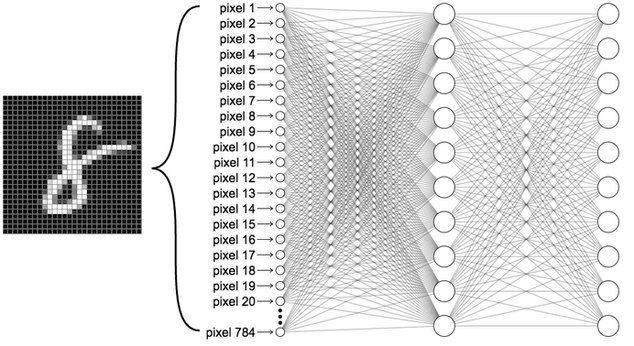

Now that we have defined our MLP, we are ready to download the MNIST dataset. PyTorch has a built-in function that allows us to download this data, and to load it into an object called a data loader. Data loaders include convenient methods to load the data in batches, and apply transformations to it. We will use the data loader to load the data into batches of **64 images**, and to normalise these.

In [ ]:
# Define a training data loader
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                     transform=transforms.Compose([
                          transforms.ToTensor(),    # convert the image to a tensor
                          transforms.Normalize((0.1307,), (0.3081,)) # normalize the image
                        ])),
    batch_size=64, shuffle=True)

# Define a test data loader
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307,), (0.3081,))
                        ])),
    batch_size=1000, shuffle=True)

# Define a function to plot the images
def plot_images(images, labels):
    fig, axes = plt.subplots(4, 4)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='binary')
        ax.set(xticks=[], yticks=[], xlabel=int(labels[i]))
        # Make a white background for the text
        ax.xaxis.label.set_color('white')
        # Increase the vertical distance between the subplots:
        fig.subplots_adjust(hspace=0.5)
    plt.show()


# Plot a few of the MNIST images with their labels:
images, labels = next(iter(train_loader))
plot_images(images, labels)


Finally, we define two functions to train and test the model

In [ ]:
# Define a function to train the model:

def train(model, device, train_loader, optimizer, epoch):
    model.train() # set the model to training mode
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device) # send the data to the device
        optimizer.zero_grad() # zero the gradients
        output = model(data) # forward pass
        loss = F.nll_loss(output, target) # calculate the loss
        loss.backward() # backward pass
        optimizer.step() # update the weights

        # Print the training loss
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# Define a function to test the model
def test(model, device, test_loader):
    model.eval() # set the model to evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad(): # don't calculate the gradients
        for data, target in test_loader:
            data, target = data.to(device), target.to(device) # send the data to the device
            output = model(data) # forward pass
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up the batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability

            # Check if the prediction is correct
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Calculate the average loss and accuracy
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))



Now we are ready to run our training loop! For educational purposes, we will train it only for a few epochs, but remember that in reality we would train it for several hundreds of epochs or more!

In [ ]:
# Run the training:

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create an instance of the MLP class
model = MLP(input_size=784, hidden_size=512, output_size=10).to(device)

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Train the model for 5 epochs
for epoch in range(5):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Let's see how our trained model performs on the test set

In [ ]:
# We can now use the model to make predictions on the test set:

# get the first batch of test images
images, labels = next(iter(test_loader))

# plot the images
plot_images(images, labels)

# get the model predictions
preds = model(images.to(device))

# get the index of the max log-probability
preds = preds.argmax(dim=1, keepdim=True)

# print the predictions

predicted_labels_list = preds.squeeze().tolist() 
print('Predicted labels:', predicted_labels_list[:16])

# print the actual labels
print('Actual labels:   ', labels[:16].tolist())

# Accuracy
print(f'Accuracy: {100*(sum(np.array(predicted_labels_list) == np.array(labels.tolist())) / len(predicted_labels_list))} %')


Not bad! With only a few epochs we already got a decent accuracy in the test set.

Congrats! You have now trained and evaluated a neural network for the classic handwritten digit recognition task!

## Keypoints

- Deep learning is an approach to AI, using machine learning and deep neural networks.
- A neuron is the most basic unit in a neural network.
- A layer is a group of neurons in a neural network.
- A neural network is a machine learning model that consists of many stacked layers of neurons, which have been shown to perform very well at solving tasks that are intuitive for humans but challenging to formalise for machines, such as image recongition or captioning.
- We train neural networks using gradient descent.
- Once trained, we assess the performance of a neural network on data that it has not seen during training.

## References and further reading

- Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep learning*. MIT press. Available [online](https://www.deeplearningbook.org/) for free.
- 3Blue1Brown (2018). *Neural networks*. [Youtube video course](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi).
- Notes for the Stanford University course *CS231n: Deep Learning for Computer Vision*. Available [online](https://cs231n.github.io/).